# Lab work #0
# Kseniia Popova 
# Group No Ks31

# 1. Using Numpy

**Task 1.1**: Create a NumPy array containing the numbers from 1 to 10. Perform the following operations:
1. Find the sum of all elements in the array.
2. Find the mean of all elements in the array.
3. Find the maximum and minimum elements in the array.
4. Sort the array in ascending order.

In [5]:
import numpy as np

arr = np.random.randint(1, 11, size=10)

sum_elements = np.sum(arr)
mean_elements = np.mean(arr)
max_element = np.max(arr)
min_element = np.min(arr)
sorted_array = np.sort(arr)

print("Масив:", arr)
print("Сума елементів:", sum_elements)
print("Середнє значення:", mean_elements)
print("Максимальний елемент:", max_element)
print("Мінімальний елемент:", min_element)
print("Відсортований масив:", sorted_array)


Масив: [ 1  7 10 10  7 10  1 10  2  2]
Сума елементів: 60
Середнє значення: 6.0
Максимальний елемент: 10
Мінімальний елемент: 1
Відсортований масив: [ 1  1  2  2  7  7 10 10 10 10]


**Task 1.2**: Create a 2x3 NumPy matrix containing the numbers from -10 to 10. Perform the following operations:
1. Find the transpose of the matrix.
2. Find the determinant of the matrix (It must throw an error for [non-square matrices](https://math.stackexchange.com/questions/854180/determinant-of-a-non-square-matrix)).
3. Multiply the matrix by a scalar (e.g., 2).
4. Add two matrices element-wise.

In [7]:
import numpy as np

matrix = np.random.randint(-10, 11, size=(2, 3))

transpose_matrix = matrix.T

try:
    determinant = np.linalg.det(matrix)
except np.linalg.LinAlgError:
    determinant = "Помилка: визначник можна знайти лише для квадратних матриць."

scalar = 2
scaled_matrix = matrix * scalar

matrix2 = np.random.randint(-10, 11, size=(2, 3))
sum_matrix = matrix + matrix2

print("Матриця:\n", matrix)
print("Транспонована матриця:\n", transpose_matrix)
print("Визначник матриці:", determinant)
print("Масштабована матриця (множимо на 2):\n", scaled_matrix)
print("Друга матриця:\n", matrix2)
print("Результат покомпонентного додавання:\n", sum_matrix)

Матриця:
 [[10  9  0]
 [-6  0 -9]]
Транспонована матриця:
 [[10 -6]
 [ 9  0]
 [ 0 -9]]
Визначник матриці: Помилка: визначник можна знайти лише для квадратних матриць.
Масштабована матриця (множимо на 2):
 [[ 20  18   0]
 [-12   0 -18]]
Друга матриця:
 [[-1 -3 -4]
 [ 6  1 -5]]
Результат покомпонентного додавання:
 [[  9   6  -4]
 [  0   1 -14]]


# 2. Using Pandas

**Task 2.1**: Data Loading and Inspection

Load the Iris dataset into a Pandas DataFrame and inspect the first few rows.

Steps:
1. Load the Iris dataset from a CSV file or directly from a URL.
2. Display the first 5 rows of the DataFrame using the head() method.
3. Use the info() method to get a concise summary of the DataFrame.

In [8]:
import pandas as pd

url = "https://raw.githubusercontent.com/VolDonets/ML_basics_course/master/lab_works/lab_0/fisher_irises.csv"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target_class"]
iris_df = pd.read_csv(url, header=0, names=column_names)

# Виводимо 5 рядків
print(iris_df.head())
print(iris_df.info())

   sepal_length  sepal_width  petal_length  petal_width target_class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   148 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   147 non-null    float64
 4   target_class  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


**Task 2.2**: Data Cleaning & Preprocessing

Handle missing values and ensure data types are appropriate.

Steps:
1. Check for any missing values in the DataFrame using isnull().sum().
2. If there are missing values, fill them with the mean of the respective column.
3. Convert any necessary columns to the appropriate data type (e.g., categorical to numerical).

In [9]:
import pandas as pd

url = "https://raw.githubusercontent.com/VolDonets/ML_basics_course/master/lab_works/lab_0/fisher_irises.csv"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target_class"]
iris_df = pd.read_csv(url, header=0, names=column_names)

print("Перевірка на відсутні значення у стовпцях:")
print(iris_df.isnull().sum(), "\n")

iris_df['sepal_length'] = iris_df['sepal_length'].fillna(iris_df['sepal_length'].mean())
iris_df['sepal_width'] = iris_df['sepal_width'].fillna(iris_df['sepal_width'].mean())
iris_df['petal_width'] = iris_df['petal_width'].fillna(iris_df['petal_width'].mean())
iris_df['target_class'] = iris_df['target_class'].fillna(iris_df['target_class'].mode()[0])  

print("Перевірка на відсутні значення після заповнення:")
print(iris_df.isnull().sum(), "\n")

iris_df['target_class'] = iris_df['target_class'].astype('category').cat.codes

print("Типи даних після обробки:")
print(iris_df.dtypes)

Перевірка на відсутні значення у стовпцях:
sepal_length    1
sepal_width     2
petal_length    0
petal_width     3
target_class    1
dtype: int64 

Перевірка на відсутні значення після заповнення:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target_class    0
dtype: int64 

Типи даних після обробки:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target_class       int8
dtype: object


**Task 2.3**: Data Analysis

Perform basic statistical analysis on the dataset.

Steps:
1. Calculate the mean, median, and standard deviation of each numerical column.
2. Group the data by the 'species' column and calculate the mean of each numerical column for each species.
3. Use the describe() method to get a statistical summary of the DataFrame.

In [10]:
import pandas as pd

url = "https://raw.githubusercontent.com/VolDonets/ML_basics_course/master/lab_works/lab_0/fisher_irises.csv"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target_class"]
iris_df = pd.read_csv(url, header=0, names=column_names)

print("Перевірка на пропущені значення:")
print(iris_df.isnull().sum())

print("\nТипи даних в DataFrame:")
print(iris_df.dtypes)

iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].apply(pd.to_numeric, errors='coerce')

print("\nОсновні статистичні показники для числових стовпців:")
print("Середнє значення:")
print(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean(), "\n")

print("Медіана:")
print(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].median(), "\n")

print("Стандартне відхилення:")
print(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].std(), "\n")

print("Середнє значення для кожної групи (species):")
print(iris_df.groupby('target_class')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean(), "\n")

print("Описова статистика для числових стовпців:")
print(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].describe())



Перевірка на пропущені значення:
sepal_length    1
sepal_width     2
petal_length    0
petal_width     3
target_class    1
dtype: int64

Типи даних в DataFrame:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target_class     object
dtype: object

Основні статистичні показники для числових стовпців:
Середнє значення:
sepal_length    5.829530
sepal_width     3.055405
petal_length    3.758667
petal_width     1.182993
dtype: float64 

Медіана:
sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64 

Стандартне відхилення:
sepal_length    0.813360
sepal_width     0.436324
petal_length    1.764420
petal_width     0.762689
dtype: float64 

Середнє значення для кожної групи (species):
                 sepal_length  sepal_width  petal_length  petal_width
target_class                                                         
Iris-setosa            5.0060     3.418000      1.464000     0.244000
Iris-versic

**Task 2.4**: Data Visualization

Visualize the distribution of data using Pandas' built-in plotting capabilities.

Steps:
1. Create a histogram for each numerical column to visualize the distribution of data.
2. Create a box plot for each numerical column to identify any outliers.
3. Use a pair plot to visualize relationships between different numerical features.

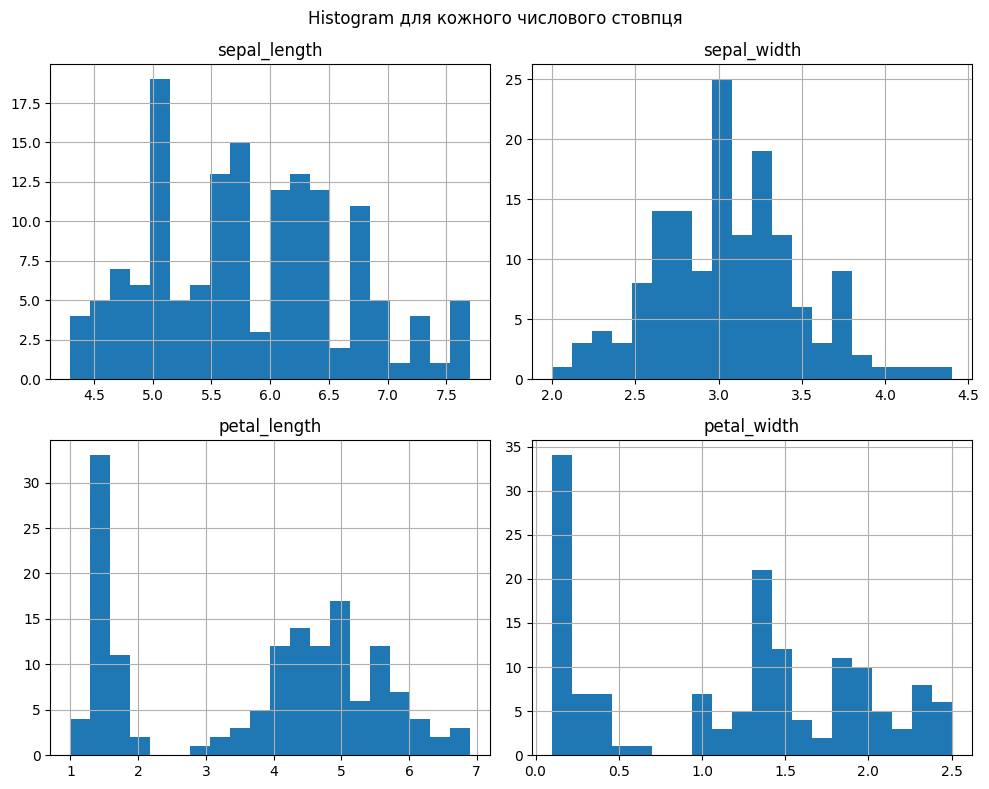

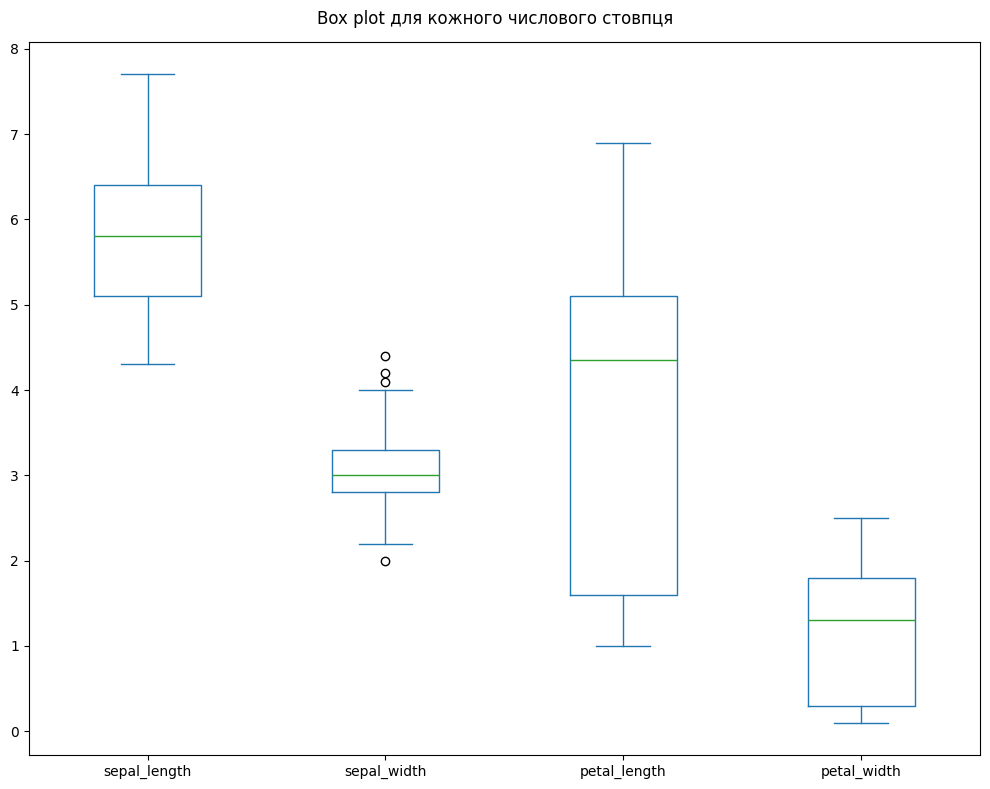

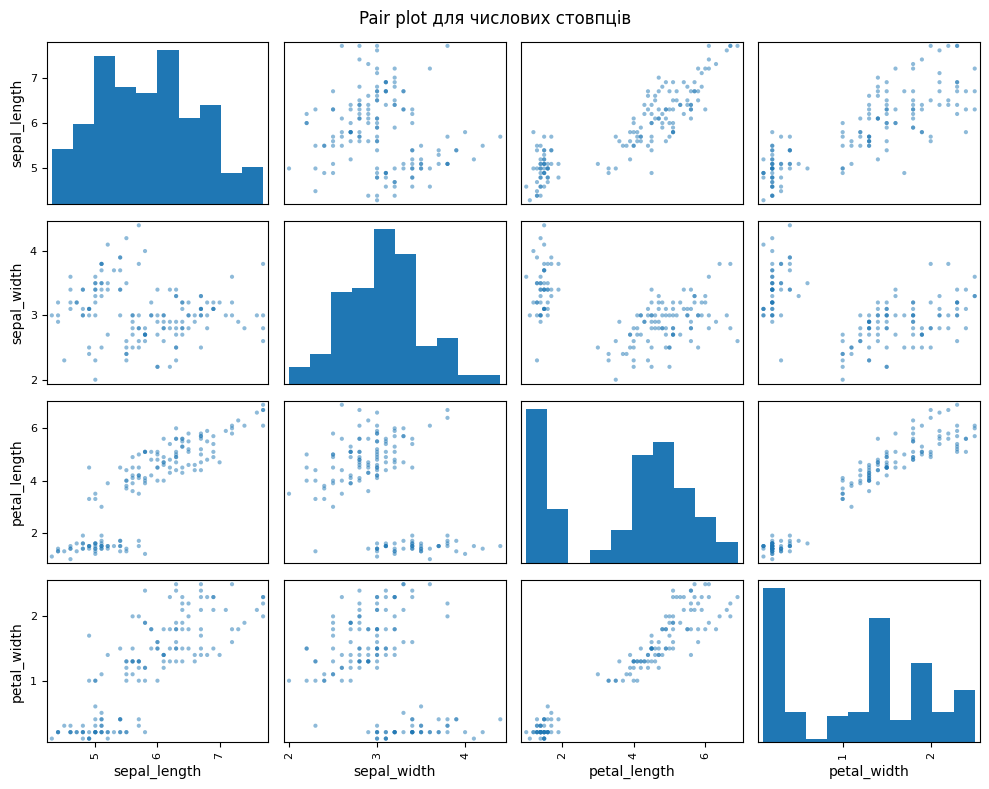

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/VolDonets/ML_basics_course/master/lab_works/lab_0/fisher_irises.csv"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target_class"]
iris_df = pd.read_csv(url, header=0, names=column_names)

iris_df.hist(figsize=(10, 8), bins=20)
plt.suptitle('Histogram для кожного числового стовпця')
plt.tight_layout()
plt.show()

iris_df.plot(kind='box', figsize=(10, 8))
plt.suptitle('Box plot для кожного числового стовпця')
plt.tight_layout()
plt.show()

pd.plotting.scatter_matrix(iris_df, figsize=(10, 8), diagonal='hist')
plt.suptitle('Pair plot для числових стовпців')
plt.tight_layout()
plt.show()



# 3. Using Matplotlib & Seaborn

**Task 3.1**: Basic Plotting with Matplotlib

Create basic plots to visualize the Iris dataset.

Steps:
1. Create a scatter plot of sepal_length vs. sepal_width using Matplotlib.
2. Color the points by species to visualize the separation between different classes.
3. Add titles, labels, and a legend to the plot.

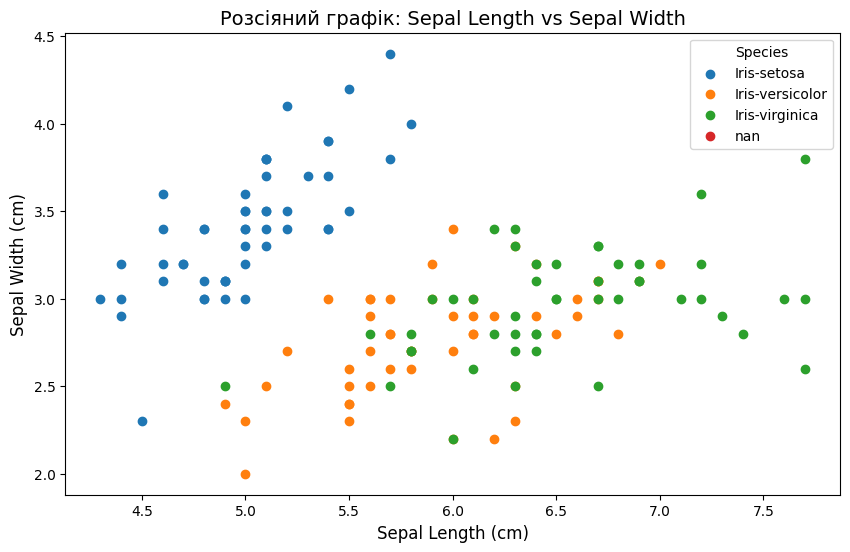

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/VolDonets/ML_basics_course/master/lab_works/lab_0/fisher_irises.csv"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target_class"]
iris_df = pd.read_csv(url, header=0, names=column_names)

plt.figure(figsize=(10, 6))
for species in iris_df['target_class'].unique():
    subset = iris_df[iris_df['target_class'] == species]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=species)

plt.title('Розсіяний графік: Sepal Length vs Sepal Width', fontsize=14)
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Sepal Width (cm)', fontsize=12)
plt.legend(title='Species')
plt.show()

**Task 3.2**: Advanced Visualizations with Seaborn

Use Seaborn to create more complex and informative visualizations.

Steps:

1. Create a pair plot using Seaborn to visualize relationships between all pairs of features in the dataset.
2. Use different colors to represent different species in the pair plot.
3. Create a violin plot to visualize the distribution of petal_length for each species.

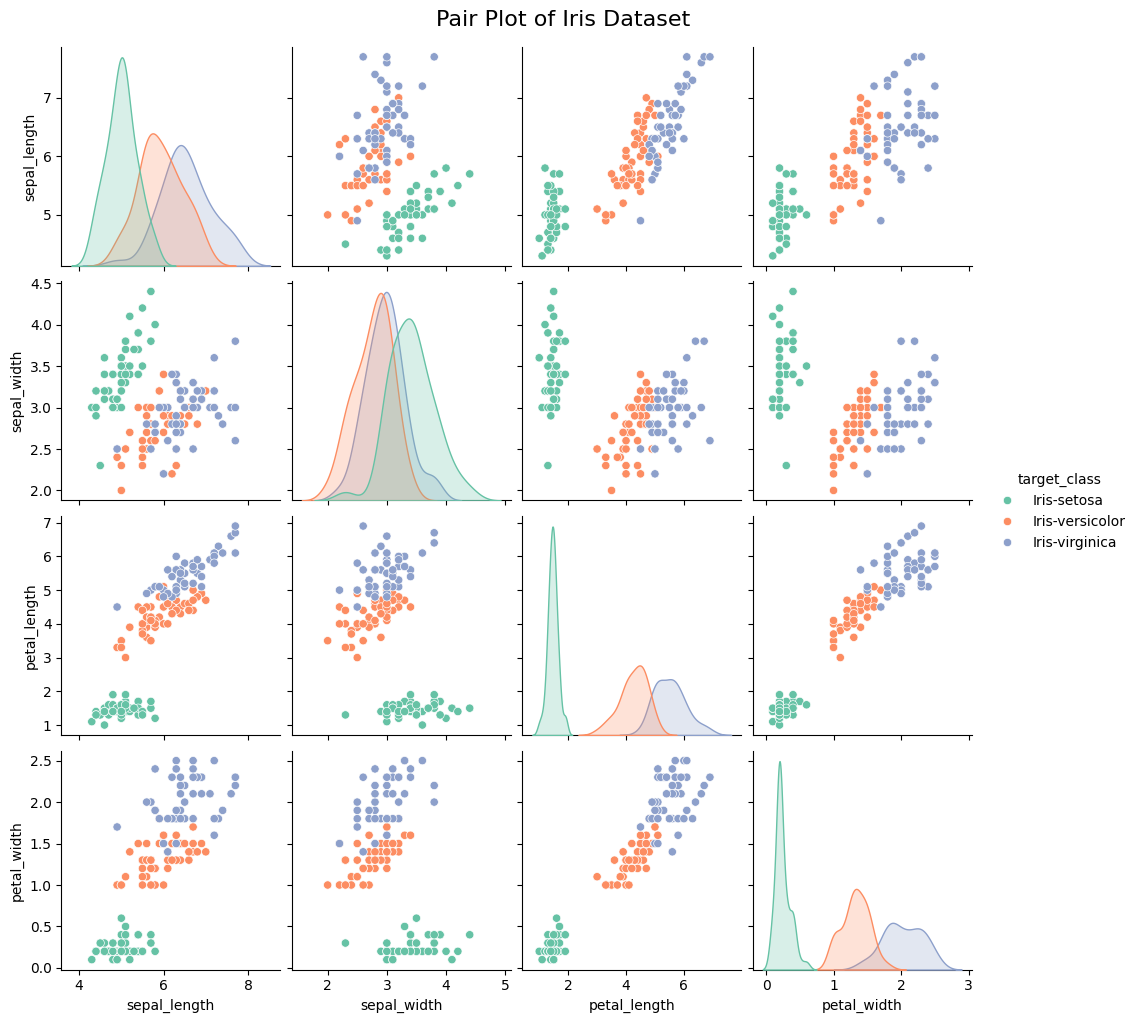

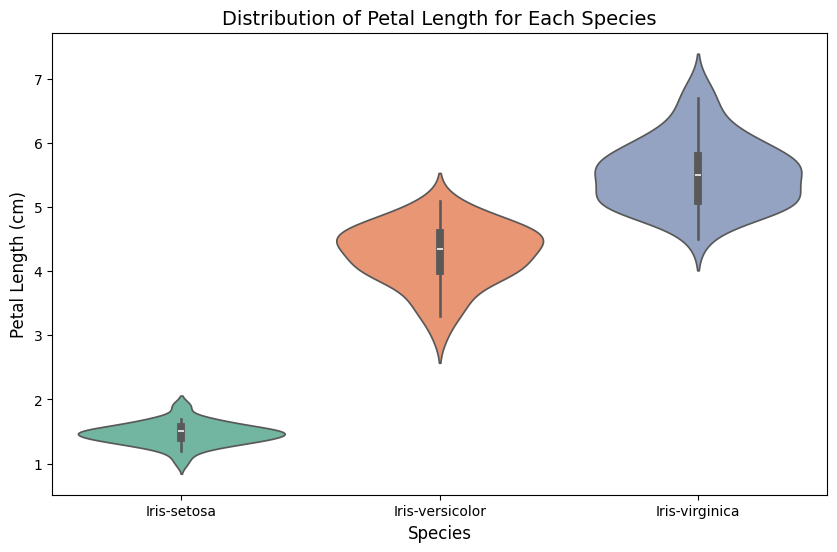

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/VolDonets/ML_basics_course/master/lab_works/lab_0/fisher_irises.csv"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target_class"]
iris_df = pd.read_csv(url, header=0, names=column_names)

iris_df['target_class'] = iris_df['target_class'].astype('category')

sns.pairplot(iris_df, hue='target_class', palette='Set2', diag_kind='kde')

plt.suptitle('Pair Plot of Iris Dataset', fontsize=16, y=1.02)
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='target_class', y='petal_length', data=iris_df, hue='target_class', palette='Set2', legend=False)

plt.title('Distribution of Petal Length for Each Species', fontsize=14)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Petal Length (cm)', fontsize=12)
plt.show()


**Task 3.3**: Combining Matplotlib and Seaborn

Combine the strengths of Matplotlib and Seaborn to create customized visualizations.

Steps:

1. Create a heatmap using Seaborn to visualize the correlation matrix of the numerical features in the dataset.
2. Customize the heatmap by adjusting the color palette and adding annotations.
3. Use Matplotlib to add a title and adjust the layout of the heatmap for better readability.

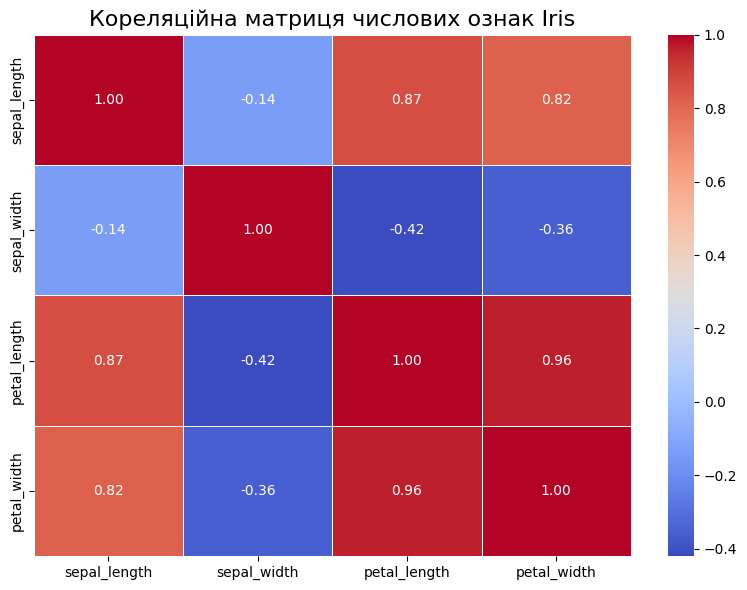

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/VolDonets/ML_basics_course/master/lab_works/lab_0/fisher_irises.csv"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target_class"]
iris_df = pd.read_csv(url, header=0, names=column_names)

correlation_matrix = iris_df.iloc[:, :-1].corr() 

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

plt.title('Кореляційна матриця числових ознак Iris', fontsize=16)

plt.tight_layout()
plt.show()

# BONUS TASK

**Bonus Task** Found a code for making __interactive__ 3D plots using `Plotly`

In [49]:
import plotly.express as px
import pandas as pd

url = "https://raw.githubusercontent.com/VolDonets/ML_basics_course/master/lab_works/lab_0/fisher_irises.csv"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target_class"]
iris_df = pd.read_csv(url, header=0, names=column_names)

fig = px.scatter_3d(iris_df, 
                    x='sepal_length', 
                    y='sepal_width', 
                    z='petal_length', 
                    color='target_class',  
                    labels={
                        'sepal_length': 'Sepal Length (cm)',
                        'sepal_width': 'Sepal Width (cm)',
                        'petal_length': 'Petal Length (cm)',
                        'target_class': 'Class'
                    },
                    title="3D Scatter Plot for Iris"
)

fig.update_layout(scene=dict(
                    xaxis_title='Sepal Length (cm)',
                    yaxis_title='Sepal Width (cm)',
                    zaxis_title='Petal Length (cm)'
                    ))

fig.show()
